In [1]:
!python -m nltk.downloader punkt
!python -m nltk.downloader stopwords

c:\Users\kayna\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kayna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\kayna\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kayna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [4]:
# Loading Data
csvData = pd.read_csv('data/dataset.csv', usecols = ["label", "text"])

In [5]:
# Removing duplicates
csvData.drop_duplicates(inplace = True)

# Removing NULL entries
csvData.dropna(inplace = True)

In [7]:
corpus = []
stemmer = PorterStemmer()
for text in csvData['text']:
    tokenized_text = word_tokenize(text)
    stemmed_string = ''
    for word in tokenized_text:
        stemmed_string += stemmer.stem(word) + ' '
    corpus.append(stemmed_string)

len(corpus[0])


687

In [ ]:
# from nltk.stem import WordNetLemmatizer

# corpusLemma = []
# wnl = WordNetLemmatizer()
# for text in csvData['text']:
#     tokenized_text = word_tokenize(text)
#     stemmed_string = ''
#     for word in tokenized_text:
#         stemmed_string += wnl.lemmatize(word) + ' ' #stemmed word
#     corpusLemma.append(stemmed_string)

In [8]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = csvData.iloc[:,0].values

In [9]:
del csvData
del corpus

In [10]:
del stemmed_string, text, tokenized_text, word

In [11]:
for label in range(len(y)):

    if y[label] == "spam":
        y[label]=1
    elif y[label] == "ham":
        y[label]=0


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
del x, y

NameError: name 'x' is not defined

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

In [3]:
model = Sequential()
model.add(Dense(800, input_shape=(len(x_train[0]),), activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(loss="binary_crossentropy", metrics = ["accuracy", recall_m, precision_m, f1_m])


TypeError: 'int' object is not iterable

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

logdir='logsTest'
tensorboardCallback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
early_stopping = EarlyStopping(monitor='accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)


In [25]:
hist = model.fit(x_train, y_train, epochs=20, batch_size = 100, callbacks=[early_stopping, tensorboardCallback])

Epoch 1/20
163/163 [==============================] - 76s 462ms/step - loss: 0.1951 - accuracy: 0.9299 - recall_m: 0.8280 - precision_m: 0.9170 - f1_m: 0.8569
Epoch 2/20
163/163 [==============================] - 89s 544ms/step - loss: 0.0566 - accuracy: 0.9805 - recall_m: 0.9588 - precision_m: 0.9741 - f1_m: 0.9658
Epoch 3/20
163/163 [==============================] - 88s 541ms/step - loss: 0.0237 - accuracy: 0.9935 - recall_m: 0.9848 - precision_m: 0.9933 - f1_m: 0.9888
Epoch 4/20
163/163 [==============================] - 81s 498ms/step - loss: 0.0118 - accuracy: 0.9971 - recall_m: 0.9927 - precision_m: 0.9969 - f1_m: 0.9947
Epoch 5/20
163/163 [==============================] - 85s 521ms/step - loss: 0.0068 - accuracy: 0.9980 - recall_m: 0.9951 - precision_m: 0.9981 - f1_m: 0.9965
Epoch 6/20
163/163 [==============================] - 90s 551ms/step - loss: 0.0041 - accuracy: 0.9988 - recall_m: 0.9971 - precision_m: 0.9989 - f1_m: 0.9980
Epoch 7/20
163/163 [==========================

In [26]:
del x_train, y_train

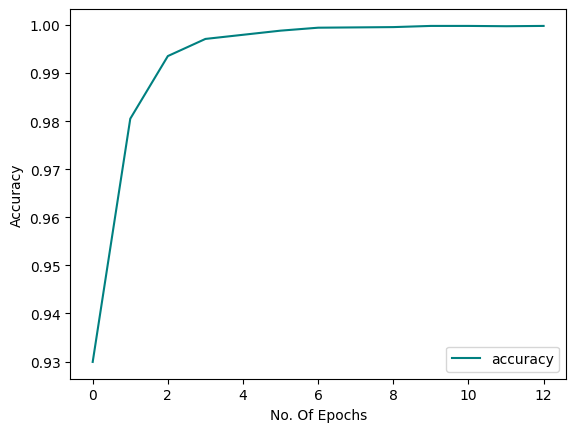

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.legend(["accuracy"], loc ="lower right")
plt.xlabel("No. Of Epochs")
plt.ylabel("Accuracy")
plt.show()

Text(70.72222222222221, 0.5, 'No. Of Epochs')

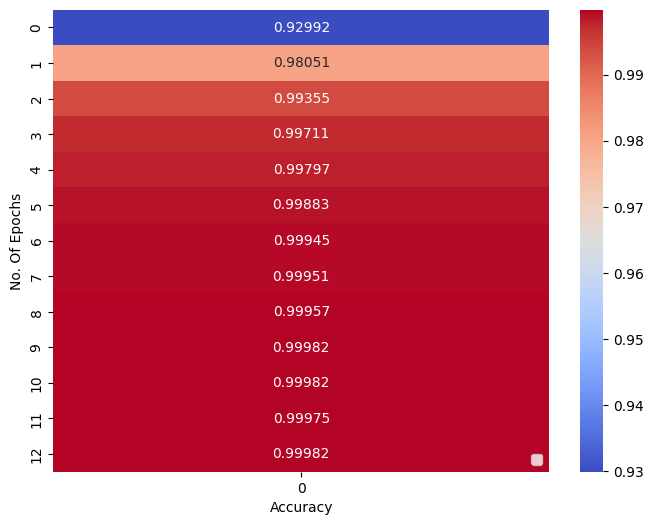

In [28]:
import seaborn as sns
data = np.array(hist.history["accuracy"]).reshape(-1, 1)

plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap="coolwarm", fmt=".5f")
plt.legend(["accuracy"], loc ="lower right")
plt.xlabel("Accuracy")
plt.ylabel("No. Of Epochs")

(4.0, 16.0)

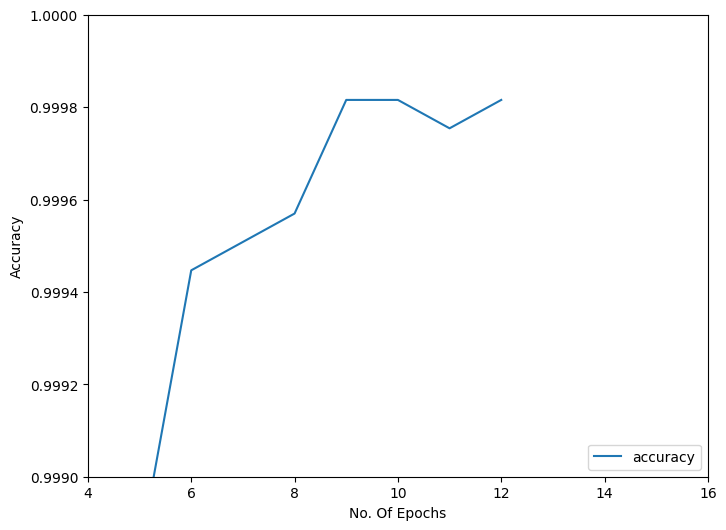

In [29]:
import seaborn as sns
data = np.array(hist.history["accuracy"]).reshape(-1, 1)

plt.figure(figsize=(8, 6))
ax=sns.lineplot(data)
plt.legend(["accuracy"], loc ="lower right")
plt.xlabel("No. Of Epochs")
plt.ylabel("Accuracy")
ax.set_ylim(0.9990,1)
ax.set_xlim(4,16)

# ax.set(yscale="log")

In [30]:
x_test = np.array(x_test, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

In [31]:
results = model.evaluate(x_test, y_test)
print('Accuracy: {:5%}'.format(results[1]))


128/128 [==============================] - 3s 24ms/step - loss: 0.2369 - accuracy: 0.9651 - recall_m: 0.9152 - precision_m: 0.9555 - f1_m: 0.9315
Accuracy: 96.508485%


In [36]:
model.save('model.h5')

In [40]:
user_text = "Hello Barry. How are you?"
prediction = model.predict(cv.transform([user_text]))[0]
prediction

1/1 [==============================] - 0s 180ms/step


array([0.00209509], dtype=float32)

In [ ]:
if prediction > 0.5:
    print("spam")
else:
    print("ham")

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Testing the model

In [43]:
from keras.models import load_model
testModel = load_model("model.h5", compile=False)
testModel.compile(loss="binary_crossentropy", metrics = ["accuracy", recall_m, precision_m, f1_m])


In [ ]:
# Loading Data
csvData = pd.read_csv('data/dataset.csv', usecols = ["label", "text"])

# Removing duplicates
csvData.drop_duplicates(inplace = True)

# Removing NULL entries
csvData.dropna(inplace = True)

In [ ]:
corpus = []
stemmer = PorterStemmer()
for text in csvData['text']:
    tokenized_text = word_tokenize(text)
    stemmed_string = ''
    for word in tokenized_text:
        stemmed_string += stemmer.stem(word) + ' '
    corpus.append(stemmed_string)

len(corpus[0])


In [ ]:
for label in range(len(y)):
    
    if y[label] == "spam":
        y[label] = 1
    elif y[label] == "ham":
        y[label] = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
del x, y, x_train, y_train

In [ ]:
x_test = np.array(x_test, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

In [ ]:
results = model.evaluate(x_test, y_test)
print('Accuracy: {:5%}'.format(results[1]))